In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [45]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [46]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [47]:
df.drop_duplicates()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


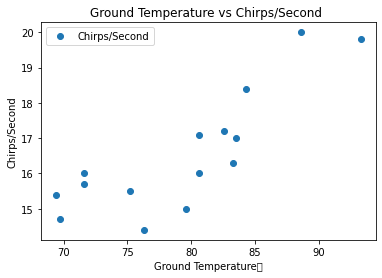

In [48]:
df.plot(x='Ground Temperature',y='Chirps/Second',style='o')
plt.title('Ground Temperature vs Chirps/Second ')
plt.xlabel('Ground Temperature	')
plt.ylabel('Chirps/Second')
plt.show()

In [49]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [59]:
x=df['Ground Temperature']
y=df['Chirps/Second']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)
xtrain

0     88.6
9     83.3
3     84.3
1     71.6
10    79.6
7     71.6
12    80.6
2     93.3
6     69.7
14    76.3
13    83.5
8     69.4
Name: Ground Temperature, dtype: float64

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=xtrain.to_frame()
xtest=xtest.to_frame()
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)


In [61]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True)
regressor.fit(xtrain,ytrain)
print(regressor.intercept_)
print(regressor.coef_)

16.55833333333333
[1.49281625]


In [62]:
ypred=regressor.predict(xtest)
print(ytest,ypred)

11    17.2
4     17.1
5     15.5
Name: Chirps/Second, dtype: float64 [17.21891123 16.81652876 15.73009607]


In [63]:
from sklearn import metrics
print(metrics.mean_absolute_error(ytest,ypred),metrics.mean_squared_error(ytest,ypred),metrics.r2_score(ytest,ypred))

0.17749284802494594 0.04455259338670323 0.926561659252687


In [64]:
#extrapolate
regressor.predict(scaler.fit_transform([[95]]))

array([16.55833333])

In [65]:
#intrapolate derived from y=mx+c --> x=(y-c)/m
(18-regressor.intercept_)/regressor.coef_

array([0.96573618])

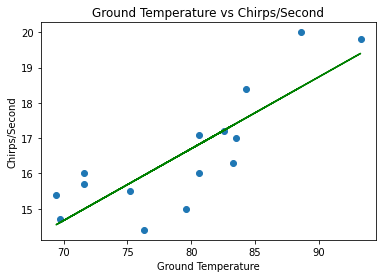

In [72]:
#only for plotting the points and y=mx+c line

regressor.fit(x,y)
plt.scatter(df['Ground Temperature'],df['Chirps/Second'])
plt.plot(x,regressor.predict(x),color='g')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [73]:
df = pd.read_fwf("brain_body.txt")

In [75]:
df.head(3)

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1


In [76]:
x=df['Body']
x=x.to_frame()
y=df['Brain']


In [78]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=2)
xtrain.head()


,Body
13,0.14
58,2.60
29,325.00
52,1.20
17,6.30


In [79]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

In [80]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True)
regressor.fit(xtrain,ytrain)
print(regressor.intercept_)
print(regressor.coef_)

101.2682173913043
[364.18786852]


In [81]:
ypred=regressor.predict(xtest)
print(ytest,ypred)

36       4.050
0        3.385
48      60.000
57     160.000
23      10.000
47       0.550
35      35.000
28     207.000
51       0.280
32    6654.000
1        0.480
30       0.750
59       1.620
27     529.000
9        0.425
10       0.101
Name: Brain, dtype: float64 [  -6.33509348    8.08738396   27.22994492   73.38187272   45.06137157
  -13.99211786   14.1186018   197.67740553  -14.25434472 2980.4288702
   -7.12177406   -8.80002598   -9.27203434  341.37772618  -11.89430296
  -13.1529919 ]


In [82]:
from sklearn import metrics
print(metrics.mean_absolute_error(ytest,ypred),metrics.mean_squared_error(ytest,ypred),metrics.r2_score(ytest,ypred))

258.976751218043 846362.7203738969 0.6693522380323425


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [83]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [84]:
df.head(3)

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200


In [92]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [ ]:
df[['Sex','Salary']].corr()

In [93]:
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [94]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [96]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [95]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [117]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [106]:
x=df[['Sex','Rank','Year','Degree','YSdeg']]


y=df.iloc[:,-1]

x.head(3)
y.head(3)

0    36350
1    35350
2    28200
Name: Salary, dtype: int64

In [174]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=2)
xtrain.head()


,Sex,Rank,Degree,YSdeg
48,0,1,1,1
38,0,1,1,5
17,0,2,0,14
42,0,2,1,7
50,1,1,1,1


In [175]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

In [176]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True)
regressor.fit(xtrain,ytrain)
print(regressor.intercept_)
print(regressor.coef_)

23204.71794871795
[-565.10647841 4548.99097301 -349.37436988 -217.79571407]


In [177]:
ypred=regressor.predict(xtest)
print(ytest,ypred)

37    17095
36    18304
32    23713
39    17600
47    15350
0     36350
27    25500
1     35350
23    38045
13    23712
9     32850
10    27025
30    21600
Name: Salary, dtype: int64 [17633.77799528 16077.12329531 18146.70239128 17633.77799528
 16335.59679406 28130.80448124 27198.79406991 28410.81743821
 27026.47840408 23449.06427983 28945.28129244 28410.81743821
 16783.90281537]


In [178]:
from sklearn import metrics
print(metrics.mean_absolute_error(ytest,ypred),metrics.mean_squared_error(ytest,ypred),metrics.r2_score(ytest,ypred))

3661.276145768127 24433682.087966125 0.5695108721953077


Feature Selection

In [179]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(xtrain, ytrain)
list(zip(['Sex', 'Rank', 'Year',
       'Degree','YSdeg'],selector.support_))

[('Sex', False), ('Rank', True), ('Year', False), ('Degree', False)]

In [180]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(xtrain, ytrain)
list(zip(['Sex', 'Rank', 'Year',
       'Degree','YSdeg'],selector.support_))

[('Sex', True), ('Rank', True), ('Year', False), ('Degree', False)]

According to this multiple Linear Regression Model, Sex is predicted to be the second best feature that influences the salary. Therefore, Sex is an important factor that decides the salary of a professor.
